<a href="https://colab.research.google.com/github/shrikantnarayankar15/Divorce-/blob/master/EDA_relationship_divorce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/shrikantnarayankar15/Divorce-/master/UKDivorceAndMarriage.csv")

In [0]:
df.head()

,Year,Total Number of Divorces,Husband Submitted Divorce,Wife Submitted Divorce,DRMale 20 to 24,DRMale 25 to 29,DRMale 30 to 34,DRMale 35 to 39,DRMale 40 to 44,DRMale 45 to 49,DRMale 50 to 54,DRMale 55 to 59,DRFemale 20 to 24,DRFemale 25 to 29,DRFemale 30 to 34,DRFemale 35 to 39,DRFemale 40 to 44,DRFemale 45 to 49,DRFemale 50 to 54,DRFemale 55 to 59,Husband Submitted - Reason Adultery,Husband Submitted - Reason Unreasonable Behaviour,Wife Submitted - Reason Adultery,Wife Submitted - Reason Unreasonable Behaviour,Total Number of Marriages,First marriage of both parties,One party previously divorced,Both parties previously divorced,Husband - Previously Divorced,Wife - Previously Divorced,Median Age of Single Males Marriage,Median Age of Single Females Marriage,"Persons marrying per 1,000 population of all ages","Men marrying per 1,000 unmarried1 men aged 16 and over","Women marrying per 1,000 unmarried1 women aged 16 and over","Number Men First Time marrying per 1,000 single population aged 16 and over","Number Women First Time marrying per 1,000 single population aged 16 and over","Number Men Re-marrying per 1,000 single population aged 16 and over","Number Women Re-marrying per 1,000 single population aged 16 and over"
0,2016,"106,959","41,669","65,290",9.4,13.2,13.0,13.4,13.6,13.8,10.8,7.8,11.8,12.7,13.9,13.9,13.7,12.9,9.3,5.9,4429.0,15020.0,7543.0,33191.0,NaN,"64,243","19,061","9,292","19,330","18,670",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,"101,055","38,490","62,565",10.5,13.0,11.9,12.6,13.1,12.6,10.1,7.1,11.2,13.3,12.4,12.7,12.9,12.0,8.7,5.1,4475.0,14179.0,7673.0,32636.0,"239,020","59,228","17,806","8,422","17,806","17,231",31.5,29.7,8.3,21.7,19.8,20.7,24.3,25.4,12.5
2,2014,"111,169","41,364","69,803",13.2,13.5,14.0,13.9,14.6,13.7,11.0,7.4,12.1,14.8,14.5,13.8,14.9,12.8,9.4,5.5,5118.0,15630.0,8932.0,36908.0,"247,372","65,375","20,110","9,810","20,386","19,726",31.2,29.5,8.6,23.0,20.9,22.1,25.9,26.2,12.8
3,2013,"114,720","40,635","74,076",14.7,15.9,15.8,16.7,16.7,15.3,12.0,7.8,16.3,16.8,16.2,16.2,16.2,14.0,10.0,5.7,5263.0,15332.0,9907.0,39879.0,"240,854","81,822","21,648","10,627","21,645","21,257",31.1,29.3,8.5,22.5,20.4,21.7,25.6,25.3,12.2
4,2012,"118,140","41,601","76,490",17.5,17.4,17.3,17.9,17.8,15.8,11.9,7.7,17.0,18.7,17.5,17.0,16.8,14.3,9.7,5.7,5675.0,15210.0,10320.0,41248.0,"263,640","83,684","22,791","11,014","22,597","22,222",31.0,29.1,9.3,24.6,22.5,23.9,28.4,27.2,13.4


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 39 columns):
Year                                                                             116 non-null int64
Total Number of Divorces                                                         116 non-null object
Husband Submitted Divorce                                                        116 non-null object
Wife Submitted Divorce                                                           116 non-null object
DRMale 20 to 24                                                                  67 non-null float64
DRMale 25 to 29                                                                  67 non-null float64
DRMale 30 to 34                                                                  67 non-null float64
DRMale 35 to 39                                                                  67 non-null float64
DRMale 40 to 44                                                                  67 non-

#1.Data Preprocessing

In [0]:
sns.heatmap(df.isnull())

In [0]:
#data is missing in this dataset ....
# we have less data so we will remove only some of the data 

In [0]:
#Deleting columns with less data
df = df.loc[:, df.isnull().mean() < .7]


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 35 columns):
Year                                                          116 non-null int64
Total Number of Divorces                                      116 non-null object
Husband Submitted Divorce                                     116 non-null object
Wife Submitted Divorce                                        116 non-null object
DRMale 20 to 24                                               67 non-null float64
DRMale 25 to 29                                               67 non-null float64
DRMale 30 to 34                                               67 non-null float64
DRMale 35 to 39                                               67 non-null float64
DRMale 40 to 44                                               67 non-null float64
DRMale 45 to 49                                               67 non-null float64
DRMale 50 to 54                                               67 non-null fl

In [0]:
df['Total Number of Divorces']=df['Total Number of Divorces'].str.replace(',','').astype(int)

In [0]:
df['Husband Submitted Divorce']=df['Husband Submitted Divorce'].str.replace(',','').str.replace(':','')
df['Wife Submitted Divorce']=df['Wife Submitted Divorce'].str.replace(',','').str.replace(':','')

df['Both parties previously divorced']=df['Both parties previously divorced'].str.replace(',','').astype('float')
df['Husband - Previously Divorced']=df['Husband - Previously Divorced'].str.replace(',','').astype('float')
df['Wife - Previously Divorced']=df['Wife - Previously Divorced'].str.replace(',','').astype('float')


In [0]:
df['Total Number of Marriages']=df['Total Number of Marriages'].str.replace(',','').astype('float')

In [0]:
df['First marriage of both parties']=df['First marriage of both parties'].str.replace(',','').astype('float')
df['One party previously divorced']=df['One party previously divorced'].str.replace(',','').astype('float')


In [0]:
df['Total Number of Marriages'] = df['Total Number of Marriages'].fillna(df['Total Number of Marriages'].mean())
df['Median Age of Single Males Marriage']=df['Median Age of Single Males Marriage'].fillna(df['Median Age of Single Males Marriage'].mean())
df['Persons marrying per 1,000 population of all ages']=df['Persons marrying per 1,000 population of all ages'].fillna(df['Persons marrying per 1,000 population of all ages'].mean())
df['Men marrying per 1,000 unmarried1 men aged 16 and over']=df['Men marrying per 1,000 unmarried1 men aged 16 and over'].fillna(df['Men marrying per 1,000 unmarried1 men aged 16 and over'].mean())
df['Women marrying per 1,000 unmarried1 women aged 16 and over']=df['Women marrying per 1,000 unmarried1 women aged 16 and over'].fillna(df['Women marrying per 1,000 unmarried1 women aged 16 and over'].mean())

In [0]:
df['Husband Submitted Divorce']=pd.to_numeric(df['Husband Submitted Divorce'], errors='coerce')
df['Wife Submitted Divorce']=pd.to_numeric(df['Wife Submitted Divorce'], errors='coerce')

#2.EDA on Data

In [0]:
bins = [1901, 1911 , 1921, 1931,1941,1951,1961,1971,1981,1991,2001,2011,2016]
df.groupby([pd.cut(df.Year, bins)])['Total Number of Divorces'].sum().nlargest(7)

Year
(1981, 1991]    1519524
(1991, 2001]    1517596
(2001, 2011]    1328120
(1971, 1981]    1291184
(2011, 2016]     552043
(1961, 1971]     445580
(1941, 1951]     273850
Name: Total Number of Divorces, dtype: int64

In [0]:
df.groupby([pd.cut(df.Year, bins)])['Total Number of Divorces'].sum().nsmallest(7)

Year
(1901, 1911]      6037
(1911, 1921]     13770
(1921, 1931]     30699
(1931, 1941]     54951
(1951, 1961]    265343
(1941, 1951]    273850
(1961, 1971]    445580
Name: Total Number of Divorces, dtype: int64

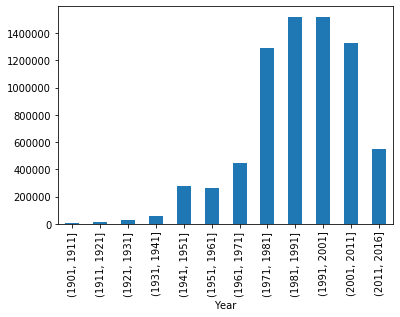

In [0]:
bins = [1901, 1911 , 1921, 1931,1941,1951,1961,1971,1981,1991,2001,2011,2016]
df.groupby([pd.cut(df.Year, bins)])['Total Number of Divorces'].sum().plot.bar()
# df.groupby([pd.cut(df.Year, bins)])['Husband Submitted Divorce'].sum().plot.hist()



*   most number of divorce occured during the 1981,1991
*   lowest during the 1901-1911



In [0]:
df.groupby([pd.cut(df.Year, bins)])['Husband Submitted Divorce'].sum().nlargest(7)

Year
(1991, 2001]    446043.0
(1981, 1991]    428130.0
(2001, 2011]    425225.0
(1971, 1981]    409963.0
(2011, 2016]    203759.0
(1961, 1971]    180390.0
(1951, 1961]    118504.0
Name: Husband Submitted Divorce, dtype: float64

In [0]:
df.groupby([pd.cut(df.Year, bins)])['Wife Submitted Divorce'].sum().nlargest(7)

Year
(1981, 1991]    1086539.0
(1991, 2001]    1067834.0
(2001, 2011]     901717.0
(1971, 1981]     877232.0
(2011, 2016]     348224.0
(1961, 1971]     262039.0
(1951, 1961]     146434.0
Name: Wife Submitted Divorce, dtype: float64



*   most no. of divorces are given by wife in the year 1981-1991


In [0]:
df.groupby([pd.cut(df.Year, bins)])['Both parties previously divorced'].sum().nlargest(7)

Year
(1991, 2001]    141501.0
(2001, 2011]    131709.0
(1981, 1991]    113238.0
(2011, 2016]     49165.0
(1971, 1981]     38843.0
(1961, 1971]      6467.0
(1951, 1961]      1681.0
Name: Both parties previously divorced, dtype: float64

In [0]:
df.groupby([pd.cut(df.Year, bins)])['Husband - Previously Divorced'].sum().nlargest(7)

Year
(1991, 2001]    287776.0
(2001, 2011]    267929.0
(1981, 1991]    235142.0
(1971, 1981]    102968.0
(2011, 2016]    101764.0
(1961, 1971]     23316.0
(1951, 1961]      6343.0
Name: Husband - Previously Divorced, dtype: float64

In [0]:
df['Wife - Previously Divorced']
df.groupby([pd.cut(df.Year, bins)])['Wife - Previously Divorced'].sum().nlargest(7)

Year
(1991, 2001]    278168.0
(2001, 2011]    262827.0
(1981, 1991]    225181.0
(1971, 1981]    100367.0
(2011, 2016]     99106.0
(1961, 1971]     22589.0
(1951, 1961]      6066.0
Name: Wife - Previously Divorced, dtype: float64

##Calculating percentage of divorce each year

In [0]:
((df.groupby([pd.cut(df.Year, bins)])['Total Number of Divorces'].sum()/df.groupby([pd.cut(df.Year, bins)])['Total Number of Marriages'].sum())*100)

Year
(1901, 1911]     0.227292
(1911, 1921]     0.426622
(1921, 1931]     0.974371
(1931, 1941]     1.607419
(1941, 1951]     7.919134
(1951, 1961]     7.629387
(1961, 1971]    11.649650
(1971, 1981]    34.282449
(1981, 1991]    44.497468
(1991, 2001]    54.504322
(2001, 2011]    53.497614
(2011, 2016]    42.080889
dtype: float64

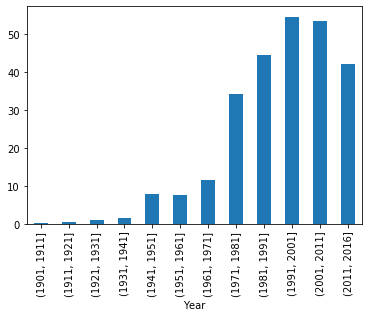

In [0]:
((df.groupby([pd.cut(df.Year, bins)])['Total Number of Divorces'].sum()/df.groupby([pd.cut(df.Year, bins)])['Total Number of Marriages'].sum())*100).plot.bar()

#insights
we can say that percentage of divorce is increasing every decade

##first marriage of both parties and divorce rate

In [0]:
((df.groupby([pd.cut(df.Year, bins)])['First marriage of both parties'].sum()/df.groupby([pd.cut(df.Year, bins)])['Total Number of Divorces'].sum())*100)

Year
(1901, 1911]     0.000000
(1911, 1921]     0.000000
(1921, 1931]     0.000000
(1931, 1941]     0.000000
(1941, 1951]     0.000000
(1951, 1961]    39.510746
(1961, 1971]    88.658602
(1971, 1981]    85.523519
(1981, 1991]    76.134237
(1991, 2001]    71.356738
(2001, 2011]    69.384017
(2011, 2016]    64.189203
dtype: float64

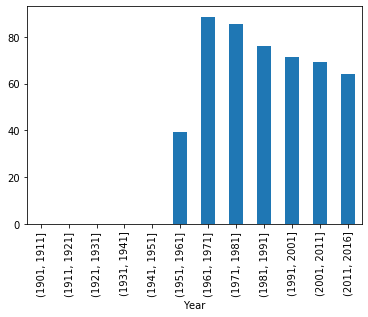

In [0]:
((df.groupby([pd.cut(df.Year, bins)])['First marriage of both parties'].sum()/df.groupby([pd.cut(df.Year, bins)])['Total Number of Divorces'].sum())*100).plot.bar()

###insights
almost 75% marriages turned to divorce if we see the data 

In [0]:
((df.groupby([pd.cut(df.Year, bins)])['One party previously divorced'].sum()/df.groupby([pd.cut(df.Year, bins)])['Total Number of Divorces'].sum())*100)

Year
(1901, 1911]     0.000000
(1911, 1921]     0.000000
(1921, 1931]     0.000000
(1931, 1941]     0.000000
(1941, 1951]     0.000000
(1951, 1961]     3.409549
(1961, 1971]     7.399569
(1971, 1981]     9.731301
(1981, 1991]    15.389490
(1991, 2001]    18.644092
(2001, 2011]    20.129055
(2011, 2016]    18.371033
dtype: float64

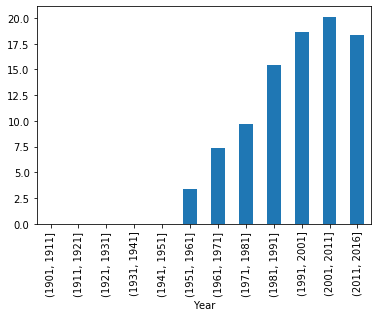

In [0]:
((df.groupby([pd.cut(df.Year, bins)])['One party previously divorced'].sum()/df.groupby([pd.cut(df.Year, bins)])['Total Number of Divorces'].sum())*100).plot.bar()

###insights
if one of the party is divorced earlier then there is 20% chance that he/she divorce again

In [0]:
((df.groupby([pd.cut(df.Year, bins)])['Both parties previously divorced'].sum()/df.groupby([pd.cut(df.Year, bins)])['Total Number of Divorces'].sum())*100)

Year
(1901, 1911]    0.000000
(1911, 1921]    0.000000
(1921, 1931]    0.000000
(1931, 1941]    0.000000
(1941, 1951]    0.000000
(1951, 1961]    0.633520
(1961, 1971]    1.451367
(1971, 1981]    3.008324
(1981, 1991]    7.452202
(1991, 2001]    9.324023
(2001, 2011]    9.916950
(2011, 2016]    8.906009
dtype: float64

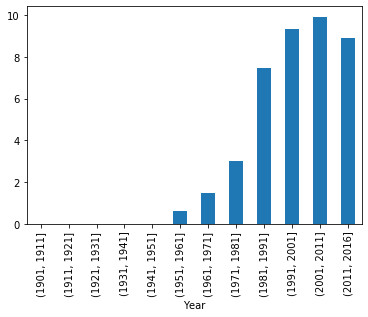

In [0]:
((df.groupby([pd.cut(df.Year, bins)])['Both parties previously divorced'].sum()/df.groupby([pd.cut(df.Year, bins)])['Total Number of Divorces'].sum())*100).plot.bar()

###insights
if one of the party is divorced earlier then there is 20% chance that he/she divorce again

In [0]:
((df.groupby([pd.cut(df.Year, bins)])['Husband - Previously Divorced'].sum()/df.groupby([pd.cut(df.Year, bins)])['Total Number of Divorces'].sum())*100)

Year
(1901, 1911]     0.000000
(1911, 1921]     0.000000
(1921, 1931]     0.000000
(1931, 1941]     0.000000
(1941, 1951]     0.000000
(1951, 1961]     2.390491
(1961, 1971]     5.232730
(1971, 1981]     7.974696
(1981, 1991]    15.474714
(1991, 2001]    18.962622
(2001, 2011]    20.173554
(2011, 2016]    18.434071
dtype: float64

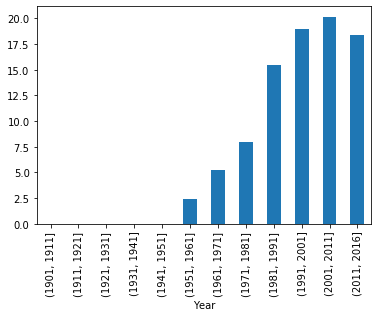

In [0]:
((df.groupby([pd.cut(df.Year, bins)])['Husband - Previously Divorced'].sum()/df.groupby([pd.cut(df.Year, bins)])['Total Number of Divorces'].sum())*100).plot.bar()

In [0]:
((df.groupby([pd.cut(df.Year, bins)])['Wife - Previously Divorced'].sum()/df.groupby([pd.cut(df.Year, bins)])['Total Number of Divorces'].sum())*100)

Year
(1901, 1911]     0.000000
(1911, 1921]     0.000000
(1921, 1931]     0.000000
(1931, 1941]     0.000000
(1941, 1951]     0.000000
(1951, 1961]     2.286098
(1961, 1971]     5.069572
(1971, 1981]     7.773253
(1981, 1991]    14.819180
(1991, 2001]    18.329516
(2001, 2011]    19.789402
(2011, 2016]    17.952587
dtype: float64

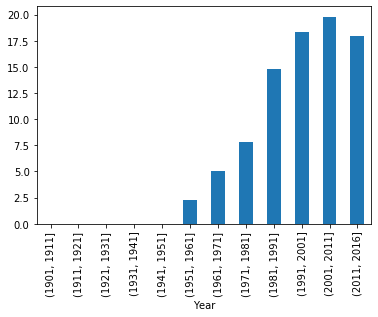

In [0]:
((df.groupby([pd.cut(df.Year, bins)])['Wife - Previously Divorced'].sum()/df.groupby([pd.cut(df.Year, bins)])['Total Number of Divorces'].sum())*100).plot.bar()

###insights
If one of them is divorced ealier and the chances are 20% chance is that they may divorce again i.e. less chances if we compare with first time marriage.

In [0]:
male_Data=df.loc[:,['DRMale 20 to 24', 'DRMale 25 to 29', 'DRMale 30 to 34',
       'DRMale 35 to 39', 'DRMale 40 to 44', 'DRMale 45 to 49',
       'DRMale 50 to 54', 'DRMale 55 to 59','Year']].melt(id_vars=["Year"], 
        var_name="Age_gap", 
        value_name="Value")

In [0]:
male_Data.groupby('Age_gap')['Value'].sum()

Age_gap
DRMale 20 to 24     985.2
DRMale 25 to 29    1253.5
DRMale 30 to 34    1158.2
DRMale 35 to 39     994.5
DRMale 40 to 44     832.4
DRMale 45 to 49     656.6
DRMale 50 to 54     448.8
DRMale 55 to 59     305.2
Name: Value, dtype: float64

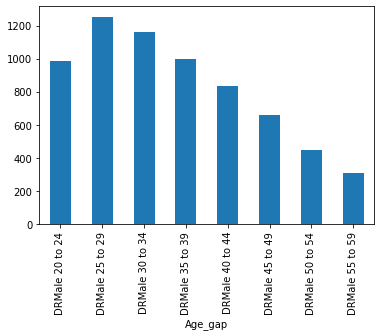

In [0]:
male_Data.groupby('Age_gap')['Value'].sum().plot.bar()


###insights
males from AGE 25-29 have higher divorces and it goes on decreasing as the age increase

###insights
males from AGE 25-29 have higher divorces and it goes on decreasing as the age increase

In [0]:
df.loc[:,df.columns.str.startswith('DRFemale')].columns.values

array(['DRFemale 20 to 24', 'DRFemale 25 to 29', 'DRFemale 30 to 34',
       'DRFemale 35 to 39', 'DRFemale 40 to 44', 'DRFemale 45 to 49',
       'DRFemale 50 to 54', 'DRFemale 55 to 59'], dtype=object)

In [0]:
Female_data=df.loc[:,['DRFemale 20 to 24', 'DRFemale 25 to 29', 'DRFemale 30 to 34',
       'DRFemale 35 to 39', 'DRFemale 40 to 44', 'DRFemale 45 to 49',
       'DRFemale 50 to 54', 'DRFemale 55 to 59','Year']].melt(id_vars=["Year"], 
        var_name="Age_gap", 
        value_name="Value")

In [0]:
Female_data.groupby('Age_gap')['Value'].sum()

Age_gap
DRFemale 20 to 24    1132.0
DRFemale 25 to 29    1258.0
DRFemale 30 to 34    1077.0
DRFemale 35 to 39     901.5
DRFemale 40 to 44     741.4
DRFemale 45 to 49     551.2
DRFemale 50 to 54     344.1
DRFemale 55 to 59     222.3
Name: Value, dtype: float64

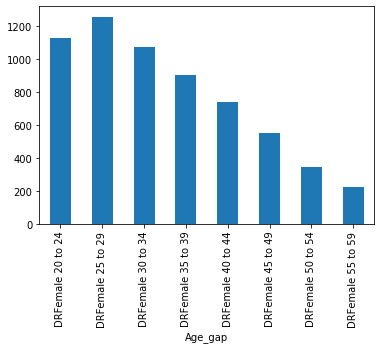

In [0]:
Female_data.groupby('Age_gap')['Value'].sum().plot.bar()

###insights
females from AGE 25-29 have higher divorces and it goes on decreasing as the age increase

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 35 columns):
Year                                                          116 non-null int64
Total Number of Divorces                                      116 non-null int64
Husband Submitted Divorce                                     112 non-null float64
Wife Submitted Divorce                                        112 non-null float64
DRMale 20 to 24                                               67 non-null float64
DRMale 25 to 29                                               67 non-null float64
DRMale 30 to 34                                               67 non-null float64
DRMale 35 to 39                                               67 non-null float64
DRMale 40 to 44                                               67 non-null float64
DRMale 45 to 49                                               67 non-null float64
DRMale 50 to 54                                               67 non-null f

In [0]:
df['Median Age of Single Males Marriage']=df['Median Age of Single Males Marriage'].fillna(df['Median Age of Single Males Marriage'].mean())

In [0]:
df['Median Age of Single Males Marriage'].min(),df['Median Age of Single Males Marriage'].max()

(23.1, 31.5)

In [0]:
###insights
#above we can say the range of age where single men do marriage and get divorce

In [0]:
df['Median Age of Single Females Marriage'].min(),df['Median Age of Single Females Marriage'].max()

(21.2, 29.7)

In [0]:
###insights
#above we can say the range of age where single women do marriage and get divorce

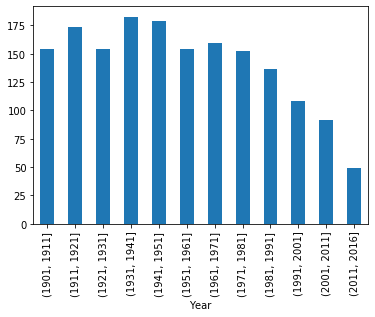

In [0]:
df.groupby([pd.cut(df.Year, bins)])['Persons marrying per 1,000 population of all ages'].sum().plot.bar()

###insights
for the two decade 1931,1941 and 1941,1951 the divorce rate was higher if we compare with total population